<a href="https://colab.research.google.com/github/0xpix/CERI-Project/blob/main/notebooks/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Google Earth Engine

## Upload the project

In [26]:
import os
os.chdir("/content")

from google.colab import files
uploaded = files.upload()

!ls

Saving CERI-Project-main.zip to CERI-Project-main.zip
CERI-Project-main.zip  sample_data  ssh-colab  ssh.tar.gz  ssh_.zip


In [27]:
%%capture
!unzip /content/CERI-Project-main.zip

# Become one with the Data

In [86]:
import pandas as pd
import numpy as np

raw_data = pd.read_excel('CERI-Project-main/data/raw/IDMC_GIDD_Disasters_Internal_Displacement_Data.xlsx')

In [87]:
raw_data.columns

Index(['ISO3', 'Country / Territory', 'Year', 'Event Name',
       'Date of Event (start)', 'Disaster Internal Displacements',
       'Disaster Internal Displacements (Raw)', 'Hazard Category',
       'Hazard Type', 'Hazard Sub Type', 'Event Codes (Code:Type)'],
      dtype='object')

In [88]:
# Array of the relevent columns
columns = ['Country / Territory', 'Date of Event (start)',
           'Disaster Internal Displacements (Raw)', 'Hazard Sub Type']

# Create the data with the relevent columns
data_with_selected_columns = raw_data[columns]
data_with_selected_columns.tail()

,Country / Territory,Date of Event (start),Disaster Internal Displacements (Raw),Hazard Sub Type
13112,Indonesia,2022-12-31,18030,Flood
13113,Indonesia,2022-12-31,1756,Flood
13114,Indonesia,2022-12-31,38920,Flood
13115,Indonesia,2022-12-31,250,Flood
13116,Indonesia,2022-12-31,155,Flood


In [89]:
#
data_with_selected_columns[data_with_selected_columns['Country / Territory'] == 'South Africa'].head(2)

,Country / Territory,Date of Event (start),Disaster Internal Displacements (Raw),Hazard Sub Type
157,South Africa,2008-11-14,3500,Storm
301,South Africa,2009-01-01,20000,Flood


In [90]:
# the names of Sub-Saharan countries
country_names = [
    "Angola", "Benin", "Botswana", "Burkina Faso", "Burundi", "Cameroon",
    "Cape Verde", "Central African Republic", "Chad", "Comoros",
    "Congo (Brazzaville)", "Congo (Democratic Republic)", "Côte d'Ivoire",
    "Djibouti", "Equatorial Guinea", "Eritrea", "Ethiopia", "Gabon",
    "The Gambia", "Ghana", "Guinea", "Guinea-Bissau", "Kenya", "Lesotho",
    "Liberia", "Madagascar", "Malawi", "Mali", "Mauritania", "Mauritius",
    "Mozambique", "Namibia", "Niger", "Nigeria", "Réunion", "Rwanda",
    "Sao Tome and Principe", "Senegal", "Seychelles", "Sierra Leone",
    "Somalia", "South Africa", "Sudan", "Swaziland", "Tanzania", "Togo",
    "Uganda", "Western Sahara", "Zambia", "Zimbabwe"
]

# Create the data with Sub-Saharan countries only
sub_saharan_data = data_with_selected_columns[data_with_selected_columns['Country / Territory'].isin(country_names)].reset_index()
sub_saharan_data.head(3)

,index,Country / Territory,Date of Event (start),Disaster Internal Displacements (Raw),Hazard Sub Type
0,2,Togo,2008-01-07,2000,Flood
1,4,Mozambique,2008-01-09,3000,Wildfire
2,6,Rwanda,2008-01-10,5000,Flood


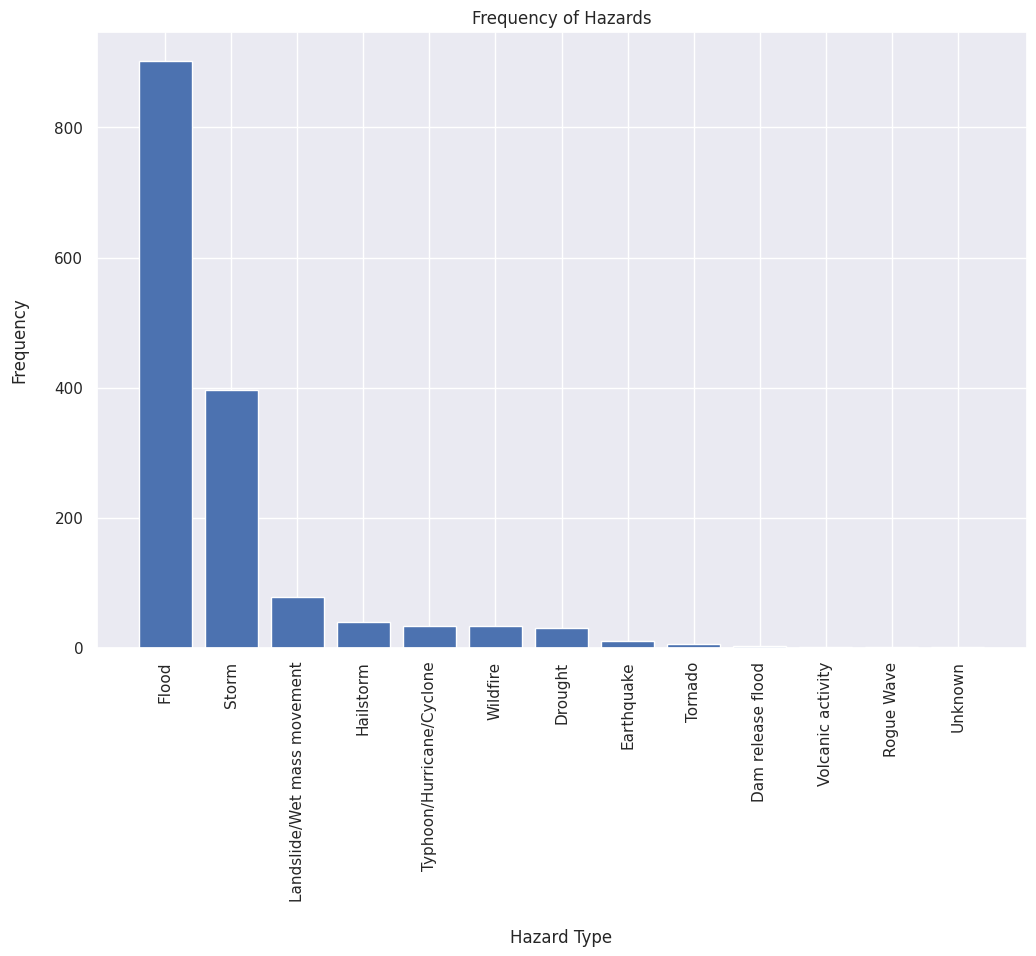

In [92]:
# Visualizing
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

hazard_frequency = sub_saharan_data['Hazard Sub Type'].value_counts()
plt.figure(figsize=(12,8))
plt.bar(hazard_frequency.index, hazard_frequency.values)
plt.xlabel('\nHazard Type')
plt.ylabel('Frequency\n')
plt.title('Frequency of Hazards')

plt.xticks(rotation=90)
plt.show()